implement the complete ML pipeline from data cleaning to model evaluation using various algorithm decision trees and random forests

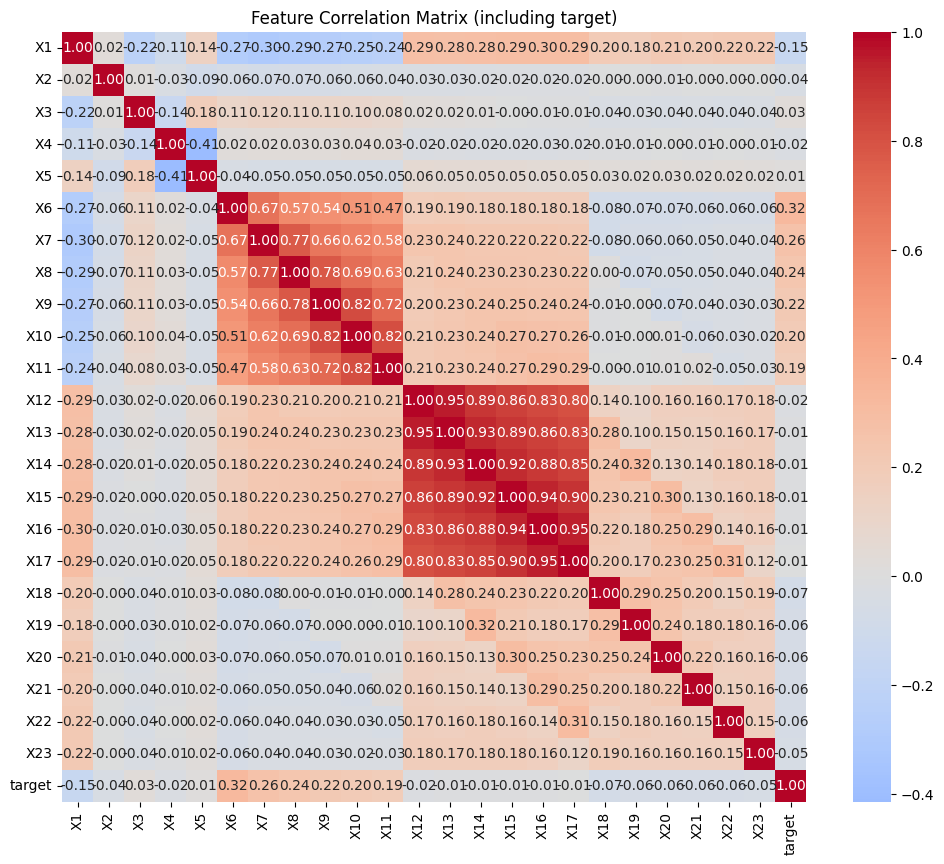

Feature correlations with target:
 target    1.000000
X6        0.324794
X7        0.263551
X8        0.235253
X9        0.216614
X10       0.204149
X11       0.186866
X1        0.153520
X18       0.072929
X19       0.058579
X21       0.056827
X20       0.056250
X22       0.055124
X23       0.053183
X2        0.039961
X3        0.028006
X4        0.024339
X12       0.019644
X13       0.014193
X14       0.014076
X5        0.013890
X15       0.010156
X16       0.006760
X17       0.005372
Name: target, dtype: float64
Dropping low-correlation features: ['X12', 'X13', 'X14', 'X5', 'X15', 'X16', 'X17']
Remaining features: ['X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


In [ ]:
# Required imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# 1. Load dataset using ucimlrepo (as per UCI instructions)
default_cc = fetch_ucirepo(id=350)
X = default_cc.data.features   # pandas DataFrame with feature columns
y = default_cc.data.targets    # pandas Series or DataFrame with target column
# or if your target is in X, adjust accordingly

# 2. Drop unnecessary columns like ID
if 'ID' in X.columns:
    X = X.drop(columns=['ID'])
# If there’s a 'NAME' column that isn't in this dataset, you'd drop that too:
# X = X.drop(columns=['NAME'], errors='ignore')

# 3. Combine X and y to compute correlations
# Assuming y is a one-column DataFrame
y.columns = ['target']  # Or use y = y.squeeze().rename('target')
df = pd.concat([X, y], axis=1)

# Continue as before
corr_matrix = df.corr()

# 4. Compute correlation matrix and plot a heatmap
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix (including target)")
plt.show()

# 5. Identify features with low absolute correlation with the target
threshold = 0.0  # Set a small threshold; adjust as needed
corr_target = corr_matrix['target'].abs().sort_values(ascending=False)
print("Feature correlations with target:\n", corr_target)

# Features to drop (below threshold, excluding target)
to_drop = corr_target[corr_target < threshold].index.tolist()
to_drop = [feat for feat in to_drop if feat != 'target']
print("Dropping low-correlation features:", to_drop)

# Drop them
X_reduced = X.drop(columns=to_drop)
print("Remaining features:", X_reduced.columns.tolist())


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_reduced)


In [ ]:
# 1. Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import pandas as pd

# 2. Ensure X and y are ready
# Assuming you already have X_reduced and y from earlier steps
# y = y.squeeze() or y.columns = ['target'] depending on how you structured it

# 3. Optional: Impute missing values (trees in sklearn don’t handle NaNs)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_reduced)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 5. Initialize and fit decision tree
clf = DecisionTreeClassifier(random_state=42, max_depth=5)  # max_depth to prevent overfitting
clf.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[4437  250]
 [ 832  481]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Accuracy Score: 0.8196666666666667


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer



# 4. Initialize and train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=2)
rf_clf.fit(X_train, y_train)

# 5. Make predictions
y_pred = rf_clf.predict(X_test)

# 6. Evaluate model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Confusion Matrix:
[[4450  237]
 [ 840  473]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Accuracy Score: 0.8205


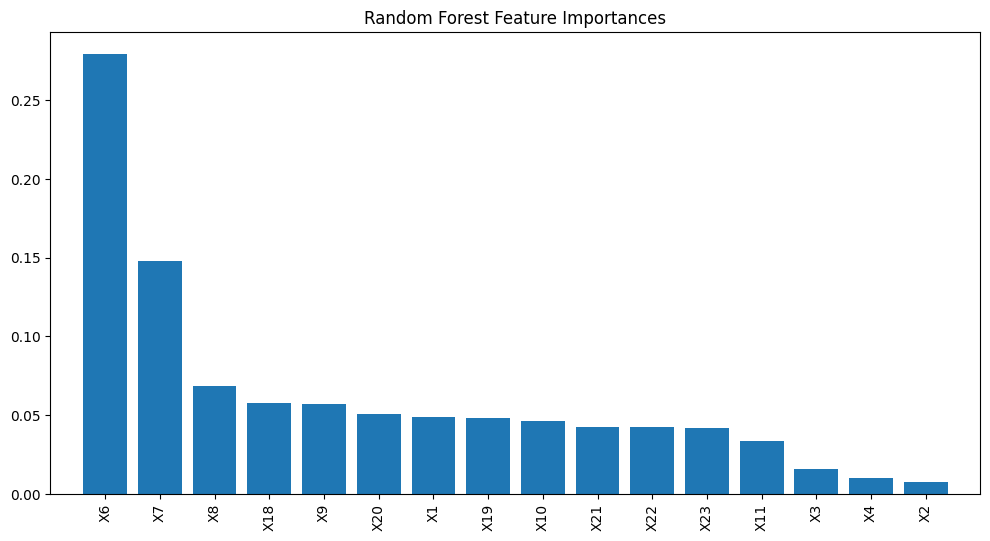

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Random Forest Feature Importances')
plt.bar(range(X_imputed.shape[1]), importances[indices], align='center')
plt.xticks(range(X_imputed.shape[1]), X_reduced.columns[indices], rotation=90)
plt.xlim([-1, X_imputed.shape[1]])
plt.show()
